# Question 16



**Part-A**

We have for the first part:

$$\sum_{n=1}^\infty \psi_n \int_{0}^L sin\frac{\pi mx}{L} \hat{H} sin\frac{\pi nx}{L} \\= \int_{0}^L sin\frac{\pi mx}{L} \hat{H} ( \sum_{n=1}^\infty \psi_n sin\frac{\pi nx}{L})dx \\ = \int_0^L sin\frac{\pi mx}{L} \hat{H}\psi \\= \int_0^L sin\frac{\pi mx}{L} E\psi \\= \int_{0}^L sin\frac{\pi mx}{L} E( \sum_{n=1}^\infty \psi_n sin\frac{\pi nx}{L})dx \\ =\sum_{n=1}^\infty \psi_n \int_{0}^L sin\frac{\pi mx}{L} E sin\frac{\pi nx}{L} dx\\ =\sum_{n=1}^\infty \psi_nE \int_{0}^L sin\frac{\pi mx}{L}sin\frac{\pi nx}{L}dx\\= \sum_{n=1}^\infty\psi_n E \frac{L}{2}\delta_{mn} = \frac{EL\psi_m}{2}$$


This essentially means than $\sum_{n}^{\infty}\psi_n H_{mn} =\psi_m$, which basically meaning $\hat{H}$ is a vector working on $\vec{\psi}$, to give $E\vec{\psi}$: $$\hat{H}\vec{\psi}=E\vec{\psi}$$


**Part-B**

We have:

$$H_{mn}= \frac{2}{L} \int_0^L sin\frac{\pi mx}{L}(\frac{-\hbar^2}{2m})(\frac{d^2}{dx^2})sin\frac{\pi nx}{L} + \frac{2a}{L^2} \int_0^L sin\frac{\pi mx}{L}xsin\frac{\pi nx}{L}\\ = 
\begin{cases} \frac{\pi^2n^2\hbar^2}{2mL^2} + \frac{a}{2} & m=n\\
-\frac{8a}{\pi^2} \frac{mn}{(m^2-n^2)^2} & m\neq n , \quad \text{one odd, one even} \end{cases}
$$

In [14]:
#part-B


import numpy as np
import math

def H_ele(m,n):
  pi=math.pi
  hbar=6.626e-34/(2*pi)
  M=9.1094e-31
  a=10
  H=0
  L=5e-10
  if(m==n):
    H= a/2 + ((pi**2)*(n**2)*(hbar**2))/(2*M*(L**2)*(1.6e-19))
  elif((int(m+n))&1==1):
      H=-(8*a)/(pi**2)*((m*n)/((m**2-n**2)**2))
  return H




In [16]:
#part C


def H_matrix(N):
  H=np.zeros([N,N])
  for i in range(N):
    for j in range(N):
      H[i,j]=H_ele(i+1,j+1)
  return H
N=10
E=np.linalg.eigh(H_matrix(10))[0]
print(E)

[  5.8391633   11.18903042  18.68083407  29.1762793   42.70529563
  59.25762659  78.82789259 101.41419799 127.01430222 155.75629971]


ground state energy is about 5.84 eV.

In [17]:
def H_matrix(N):
  H=np.zeros([N,N])
  for i in range(N):
    for j in range(N):
      H[i,j]=H_ele(i+1,j+1)
  return H
N=100
E=np.linalg.eigh(H_matrix(100))[0][:10]
print(E)

[  5.8391629   11.1890291   18.6808322   29.17627051  42.70528652
  59.25757408  78.82784084 101.41356797 127.01347174 155.62684956]


The acuracy of both the methods are pretty much the same. Especially in the lower energy Eigen values. The reason being that the lower energy eigen values are more or less specified by the lower harmonics and the higher energy values have more contribution from the higher harmonics. So, there is noticeable difference in the higher energy values.

Part-E

We calculate the eigen vectors which will give us the wave function.

In [19]:
import matplotlib.pyplot as plt




Vec=[]
for i in range(3):
  Vec.append(np.linalg.eigh(H_matrix(10))[1][i])


print(Vec)

[array([ 9.36606791e-01,  3.48565827e-01, -3.47688964e-02, -7.71102476e-03,
        7.69478215e-04,  7.85167747e-04,  6.56596006e-05,  1.74473984e-04,
       -1.09631428e-05, -5.59002254e-05]), array([ 3.45926989e-01, -9.04153746e-01,  2.49863662e-01,  1.91272327e-02,
       -6.45870847e-03, -5.80143580e-04, -8.48385286e-04, -6.18676046e-05,
        2.13865444e-04,  1.74965907e-05]), array([ 5.46043968e-02, -2.45605755e-01, -9.49850920e-01, -1.85251078e-01,
        1.15284117e-02,  5.26212032e-03,  4.15664466e-04,  7.90080250e-04,
       -5.05236254e-05, -2.16180419e-04])]


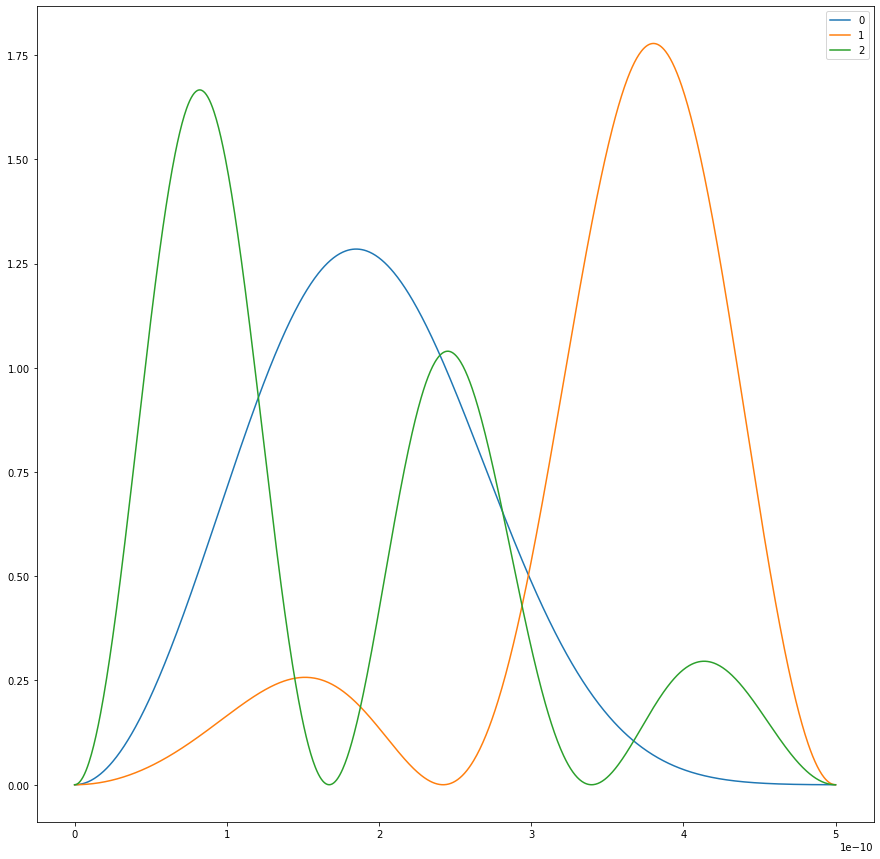

the value of the integrals are: [0.4994999999999999, 0.4995, 0.4994999999999997]


<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt




Vec=[]
for i in range(3):
  Vec.append(np.linalg.eigh(H_matrix(10))[1][i])

#print(Vec[0])

#Making wave functions:
#i represents state, i=0 is ground state, i=j is jth excited state and so on.
#L is length of cavity 
# N is number of sin terms that we are taking. Here N=10

def wave(i, L, N, x):
  sum=0
  for j in range(N):
    sum+= np.sin(((j+1)*np.pi*x)/L)*Vec[i][j]
  return sum


N=10
L=5e-10

x=np.linspace(0, 5e-10, 1000)
plt.figure(figsize=(15,15))
y=[]
for i in range(3):
  wave_i=[]
  for k in range(len(x)):
    wave_i.append(np.abs(wave(i, L, N, x[k]))**2)
  y.append(wave_i)
  plt.plot(x, wave_i, label=i)
  
plt.legend()
plt.show()
plt.savefig('Q16.png')


#for the integrals we can easily check by trapezoidal method. The spacing is 5e-12

integral=[]

for i in range(3):
  integral.append(1e-3*np.sum(y[i]))

print('the value of the integrals are:', integral)

#Clearly, the values are normalised. 


